## 1. State value & State action value的程式碼/結果

In [10]:
import numpy as np

# Initial setting
reward = {0: [15, 7], 1: [7, -15], 2: [-20, 5], 4: [0, 30], 5: [0, 10]}
trans_prob = {0: {0: [0.2,0.8], 1: [0.7,0.3], 2: [0.3,0.7], 4: [0.0,1.0], 5: [0.2,0.8]},
              1: {0: [0.9,0.1], 1: [0.2,0.8], 2: [0.7,0.3], 4: [0.0,1.0], 5: [0.8,0.2]}
           }
gamma = 0.9

#
def doCalc(pi_prob):
    value = np.zeros((8,3))
    # calculate state value
    value[7][0] = 0
    value[6][0] = 0
    value[5][0] = pi_prob[5][0]*(trans_prob[0][5][0]*(reward[5][0]+gamma*value[6][0])+\
                                 trans_prob[0][5][1]*(reward[5][1]+gamma*value[7][0]))+\
                  pi_prob[5][1]*(trans_prob[1][5][0]*(reward[5][0]+gamma*value[6][0])+\
                                 trans_prob[1][5][1]*(reward[5][1]+gamma*value[7][0]))

    value[4][0] = pi_prob[4][0]*(trans_prob[0][4][1]*(reward[4][1]+gamma*value[6][0]))+\
                  pi_prob[4][1]*(trans_prob[1][4][1]*(reward[4][1]+gamma*value[6][0]))

    value[3][0] = 0

    value[2][0] = pi_prob[2][0]*(trans_prob[0][2][0]*(reward[2][0]+gamma*value[4][0])+\
                                 trans_prob[0][2][1]*(reward[2][1]+gamma*value[5][0]))+\
                  pi_prob[2][1]*(trans_prob[1][2][0]*(reward[2][0]+gamma*value[4][0])+trans_prob[1][2][1]*(reward[2][1]+gamma*value[5][0]))

    value[1][0] = pi_prob[1][0]*(trans_prob[0][1][0]*(reward[1][0]+gamma*value[3][0])+\
                                 trans_prob[0][1][1]*(reward[1][1]+gamma*value[4][0]))+\
                  pi_prob[1][1]*(trans_prob[1][1][0]*(reward[1][0]+gamma*value[3][0])+trans_prob[1][1][1]*(reward[1][1]+gamma*value[4][0]))

    value[0][0] = pi_prob[0][0]*(trans_prob[0][0][0]*(reward[0][0]+gamma*value[1][0])+\
                                 trans_prob[0][0][1]*(reward[0][1]+gamma*value[2][0]))+\
                  pi_prob[0][1]*(trans_prob[1][0][0]*(reward[0][0]+gamma*value[1][0])+trans_prob[1][0][1]*(reward[0][1]+gamma*value[2][0]))

    # calculate Q-value a1/a2
    value[5][1] = trans_prob[0][5][0]*(reward[5][0]+gamma*(pi_prob[6][0]*value[6][1]+pi_prob[6][1]*value[6][2]))+\
                  trans_prob[0][5][1]*(reward[5][1]+gamma*(pi_prob[7][0]*value[7][1]+pi_prob[7][1]*value[7][2]))
    value[5][2] = trans_prob[1][5][0]*(reward[5][0]+gamma*(pi_prob[6][0]*value[6][1]+pi_prob[6][1]*value[6][2]))+\
                  trans_prob[1][5][1]*(reward[5][1]+gamma*(pi_prob[7][0]*value[7][1]+pi_prob[7][1]*value[7][2]))

    value[4][1] = trans_prob[0][4][1]*(reward[4][1]+gamma*(pi_prob[6][0]*value[6][1]+pi_prob[6][1]*value[6][2]))
    value[4][2] = trans_prob[1][4][1]*(reward[4][1]+gamma*(pi_prob[6][0]*value[6][1]+pi_prob[6][1]*value[6][2]))

    value[2][1] = trans_prob[0][2][0]*(reward[2][0]+gamma*(pi_prob[4][0]*value[4][1]+pi_prob[4][1]*value[4][2]))+\
                  trans_prob[0][2][1]*(reward[2][1]+gamma*(pi_prob[5][0]*value[5][1]+pi_prob[5][1]*value[5][2]))
    value[2][2] = trans_prob[1][2][0]*(reward[2][0]+gamma*(pi_prob[4][0]*value[4][1]+pi_prob[4][1]*value[4][2]))+\
                  trans_prob[1][2][1]*(reward[2][1]+gamma*(pi_prob[5][0]*value[5][1]+pi_prob[5][1]*value[5][2]))

    value[1][1] = trans_prob[0][1][0]*(reward[1][0]+gamma*(pi_prob[3][0]*value[3][1]+pi_prob[3][1]*value[3][2]))+\
                  trans_prob[0][1][1]*(reward[1][1]+gamma*(pi_prob[4][0]*value[4][1]+pi_prob[4][1]*value[4][2]))
    value[1][2] = trans_prob[1][1][0]*(reward[1][0]+gamma*(pi_prob[3][0]*value[3][1]+pi_prob[3][1]*value[3][2]))+\
                  trans_prob[1][1][1]*(reward[1][1]+gamma*(pi_prob[4][0]*value[4][1]+pi_prob[4][1]*value[4][2]))

    value[0][1] = trans_prob[0][0][0]*(reward[0][0]+gamma*(pi_prob[1][0]*value[1][1]+pi_prob[1][1]*value[1][2]))+\
                  trans_prob[0][0][1]*(reward[0][1]+gamma*(pi_prob[2][0]*value[2][1]+pi_prob[2][1]*value[2][2]))
    value[0][2] = trans_prob[1][0][0]*(reward[0][0]+gamma*(pi_prob[1][0]*value[1][1]+pi_prob[1][1]*value[1][2]))+\
                  trans_prob[1][0][1]*(reward[0][1]+gamma*(pi_prob[2][0]*value[2][1]+pi_prob[2][1]*value[2][2]))

    return value
#################
# Build value_a #
#################
pi_prob_a = {0:[0.5,0.5], 1:[0.5,0.5], 2:[0.5,0.5], 3:[0,0], 
			 4:[0.5,0.5],5:[0.5,0.5], 6:[0,0], 7:[0,0]
		  }
value_a = doCalc(pi_prob_a)
print('1-(a) Uniform Policy: \n')
print(value_a)
np.save('value_a.npy',value_a)


#################
# Build value_b #
#################
pi_prob_b = {0:[0,1], 1:[0,1], 2:[1,0], 3:[0,0], 
			 4:[0,1],5:[1,0], 6:[0,0], 7:[0,0]
		}
value_b = doCalc(pi_prob_b)
print('====================================\n')
print('1-(b) Specific Policy: \n')
print(value_b)
np.save('value_b.npy',value_b)


1-(a) Uniform Policy: 

[[19.5675 16.295  22.84  ]
 [ 9.75    8.5    11.    ]
 [ 8.25    8.75    7.75  ]
 [ 0.      0.      0.    ]
 [30.     30.     30.    ]
 [ 5.      8.      2.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]]

1-(b) Specific Policy: 

[[24.0676 18.2408 24.0676]
 [11.      8.5    11.    ]
 [10.64   10.64    8.56  ]
 [ 0.      0.      0.    ]
 [30.     30.     30.    ]
 [ 8.      8.      2.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]]


---
## 1. Uniform policy & Specific Policy結果之討論
- 由結果可以看出兩者的state-value & Q-value是差不多的，只是Specific policy內的值比較大，我想主要的原因是因為在specific policy中堅定的選擇了比較好的action（機率=1.0），不會像uniform policy那樣兩個action被選擇的機率是一樣的(機率=0.5)，也因此降低了期望值。
    - 舉一個比較簡單觀察的例子就是S4的state value，很明顯的可以看出如果最後往右邊走會比較好（得到reward 10, 反之則為0)，而action 1有0.8的機率往右邊走，action 2只有0.2的機率，如果policy可以堅定的選擇action 1（機率=1.0），則得到的期望值會最大(state value = 8), 反之若使用uniform policy只能得到期望值(state value = 5)。

---
## 2-(a) DQN  實作
### 模型說明
- 超參數設定
  - Batch size: 64
  - Learning rate: 0.05
  - Epsilon = 0.1
  - Gamma = 0.99
  - Target model change freqency = 10
  - Replay buffer size = 200
  - Hidden layer size = 128
  - Episode number = 500
- 使用到的DQN training tips
  - 使用兩個model, 一個target net和一個update net, 當update net更新一定次數之後才會更新target net一次。
  - 使用Replay buffer，累積了一定次數的遊玩經驗後，再隨機從裡面拿batch size大小的經驗出來更新update net

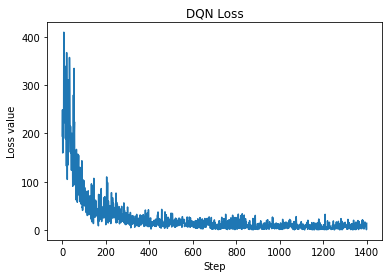

In [51]:
# Import moudules
import matplotlib.pyplot as plt # use to show images
import os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(torch.cuda.is_available())

# Import environment
from finite_MDP_env import environment as Env
# Define Classes
class Experience_Unit():
    def __init__(self, state, action, reward, next_state):
        self.state = state
        self.action = action
        self.reward = reward
        self.next_state = next_state


class Net(nn.Module):
    def __init__(self, n_states, n_actions, n_hidden):
        super(Net, self).__init__()

        # 輸入層 (state) 到隱藏層，隱藏層到輸出層 (action)
        self.result = nn.Sequential(
            nn.Linear(n_states, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions)
        )
        self.initialize_weights()
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight.data, 0.0, 0.02)
    def forward(self, x):
        return self.result(x)


class DQN(object):
    def __init__(self, n_states, n_actions, BATCH_SIZE, LR, EPSILON, GAMMA, TARGET_ITER_CNT, BUFFER_SIZE, NUM_HIDDEN):
        self.n_states = n_states
        self.n_actions = n_actions
        self.n_hidden = NUM_HIDDEN

        self.eval_net = Net(self.n_states, self.n_actions, self.n_hidden).to(device)
        self.target_net = Net(self.n_states, self.n_actions, self.n_hidden).to(device)

        self.batch_size = BATCH_SIZE
        self.lr = LR
        self.epsilon = EPSILON
        self.gamma = GAMMA
        self.target_iter_cnt = TARGET_ITER_CNT
        self.buffer_size = BUFFER_SIZE

        self.buffer = []
        self.learn_step_cnt = 0 # 讓 target network 知道什麼時候要更新
        self.optimizer = torch.optim.Adam(self.eval_net.parameters(), lr=self.lr)
        self.loss_func = nn.MSELoss()
        self.loss_list = []

    def choose_action(self, state):
        x = torch.unsqueeze(torch.FloatTensor(state), 0).to(device)

        # epsilon-greedy
        if np.random.uniform() < self.epsilon: # Do exploration
            action = np.random.randint(0, self.n_actions) # randomly pick a number from [0,num_actions)
        else: # Do exploitation
            actions_value = self.eval_net(x).cpu() # 以現有 eval net 得出各個 action 的分數
            action = torch.max(actions_value, 1)[1].data.numpy()[0] # 挑選最高分的 action

        return action

    def store_transition(self, state, action, reward, next_state):
      # 打包 experience
      #transition = np.hstack((state, [action, reward], next_state)) # exp = s,a,r,s'
        exp = Experience_Unit(state,action,reward,next_state)
      
        if(len(self.buffer) == BUFFER_SIZE):
            self.buffer.pop(0)
        self.buffer.append(exp)

    def learn(self):
        # 隨機取樣 batch_size 個 experience
        sample_idx = np.random.choice(len(self.buffer), BATCH_SIZE)
        exps = [self.buffer[idx] for idx in sample_idx]
        b_state = torch.FloatTensor([exp.state for exp in exps]).to(device)
        b_action = torch.LongTensor([exp.action for exp in exps]).to(device)
        b_reward = torch.FloatTensor([exp.reward for exp in exps]).to(device)
        b_next_state = torch.FloatTensor([exp.next_state for exp in exps]).to(device)

        # 計算現有 eval net 和 target net 得出 Q value 的落差
        q_eval = self.eval_net(b_state).gather(1, b_action.view(self.batch_size,1)) # 重新計算這些 experience 當下 eval net 所得出的 Q value
        q_next = self.target_net(b_next_state) #.detach() # detach 才不會訓練到 target net
                
        # Get loss
        q_target = b_reward.view(self.batch_size,1) + self.gamma * q_next.max(1)[0].view(self.batch_size, 1) # 計算這些 experience 當下 target net 所得出的 Q value
        loss = self.loss_func(q_eval, q_target)
        self.loss_list.append(loss.item())

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # 每隔一段時間 (target_replace_iter), 更新 target net，即複製 eval net 到 target net
        self.learn_step_cnt += 1
        if self.learn_step_cnt % TARGET_ITER_CNT == 0:
            self.target_net.load_state_dict(self.eval_net.state_dict())
##################
# Finite MDP env #
##################

env = Env()
# Environment parameters
n_actions = env.action_space.n
n_states = env.observation_space.n

# Hyperparameters
BATCH_SIZE = 16
LR = 0.005 # learning rate
EPSILON = 0.1 # for epsilon-greedy policy
GAMMA = 0.99 # for Q-value
TARGET_ITER_CNT = 10 # every interation count, update target net once
BUFFER_SIZE = 200 # replay buffer size(often larger than tager interation count)
NUM_HIDDEN = 128
NUM_EPISODE = 500

# 建立 DQN
dqn = DQN(n_states, n_actions, BATCH_SIZE, LR, EPSILON, GAMMA, TARGET_ITER_CNT, BUFFER_SIZE, NUM_HIDDEN)
reward_list_MDP = []
# 學習
for eps in range(NUM_EPISODE):
    t = 0
    rewards = 0
    state = env.reset()
    #env.render()
    while True:

        # 選擇 action
        action = dqn.choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # 儲存 experience
        # 如果是terminal state就先在reward減去GAMMA*max_q-value, 避免訓練到terminal state 的q-value
        if done:
            ns = torch.FloatTensor([next_state]).to(device)
            target = dqn.target_net(ns)
            r = reward
            r -= GAMMA*target.max(1)[0].to("cpu")
            dqn.store_transition(state, action, r, next_state)
        else:
            dqn.store_transition(state, action, reward, next_state)

        # 累積 reward
        rewards += reward

        # 有足夠 experience 後進行訓練
        if len(dqn.buffer) >= BATCH_SIZE:
            dqn.learn()

        # 進入下一 state
        state = next_state

        if done:
            #print('t: {} timesteps, r: {}, eps: {}'.format(t+1, rewards, eps))
            reward_list_MDP.append(rewards)
            break
        t += 1
#env.close()
plt.title("DQN Loss")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.plot(dqn.loss_list)
plt.show()

## 2-(b) 比較用公式計算的結果和DQN產生的結果之差異

In [42]:
# show DQN q-value
states = torch.eye(n_states)
with torch.no_grad():
    r = dqn.eval_net(states)
    r = r.numpy()
    print(r)

[[18.7095    24.505524 ]
 [ 8.272772  10.57602  ]
 [ 9.749409   7.746413 ]
 [15.971216  17.291365 ]
 [30.447464  29.031666 ]
 [ 6.8297625  1.4712956]
 [15.869827  17.141455 ]
 [15.875975  17.235765 ]]


---
- 以下是DQN/Uniform Policy/Special Policy的Q-value table
- 最後的結果可以發現DQN在non-terminal state的結果跟special policy公式算出來的基本上沒有差異！ 本來沒有寄信問助教之前，DQN的結果跟公式計算的結果一直有一個常數的誤差，後來寄信問助教之後才發現原來我把terminal state的q-value也加進去做訓練了，本來在公式中可以發現terminal state的q-value都是0，但是在DQN中其實不會是0，所以在訓練的時候要避免這種情況才行！

DQN            |a1 | a2|  Uniform Policy |a1 | a2| Specific Policy |a1 | a2|     
--------------|:-----:|-----:|--------------:|-----:|-----:|--------------:|:-----:|-----:|
State0   | 18.70|  24.50 |State0   | 16.295 | 22.84|State0|18.24|24.06|
State1   | 8.27 | 10.57 |State1   | 8.5 | 11  |State1|8.5|11|
State2   | 9.74 | 7.74 |State2   | 8.75  | 7.75 |State2|10.64|8.56|
State3   | 15.97 | 17.29 |State3   | 0    | 0    |State3|0|0|
State4   | 30.44 | 29.03 |State4   | 30    | 30   |State4|30|30|
State5   | 6.82 | 1.47 |State5   | 8    | 2    |State5|8|2|
State6   | 15.86 | 17.14 |State6   | 0    | 0    |State6|0|0|
State7   | 15.87 | 17.23 |State7   |0     | 0    |State7|0|0|


## 3. 將 DQN 用在 OpenAI gym 的 LunarLander-v2 上面

In [15]:
# Import moudules
import matplotlib.pyplot as plt # use to show images
import matplotlib.image as mpimg # use to read images
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gym
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
import sys

# Define Classes
class Experience_Unit():
  def __init__(self, state, action, reward, next_state):
    self.state = state
    self.action = action
    self.reward = reward
    self.next_state = next_state


class Net(nn.Module):
    def __init__(self, n_states, n_actions, n_hidden):
        super(Net, self).__init__()

        # 輸入層 (state) 到隱藏層，隱藏層到輸出層 (action)
        self.result = nn.Sequential(
            nn.Linear(n_states, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions)
        )
        self.initialize_weights()
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight.data, 0.0, 0.02)
    def forward(self, x):
        return self.result(x)


class DQN(object):
    def __init__(self, n_states, n_actions, BATCH_SIZE, LR, EPSILON, GAMMA, TARGET_ITER_CNT, BUFFER_SIZE, NUM_HIDDEN, EPS_DECAY, TAU):
        self.n_states = n_states
        self.n_actions = n_actions
        self.n_hidden = NUM_HIDDEN

        self.eval_net = Net(self.n_states, self.n_actions, self.n_hidden).to(device)
        self.target_net = Net(self.n_states, self.n_actions, self.n_hidden).to(device)

        self.batch_size = BATCH_SIZE
        self.lr = LR
        self.epsilon = EPSILON
        self.gamma = GAMMA
        self.target_iter_cnt = TARGET_ITER_CNT
        self.buffer_size = BUFFER_SIZE
        self.eps_decay = EPS_DECAY
        self.tau = TAU

        self.buffer = []
        self.learn_step_cnt = 0 # 讓 target network 知道什麼時候要更新
        self.optimizer = torch.optim.Adam(self.eval_net.parameters(), lr=self.lr)
        self.loss_func = nn.MSELoss()
        self.loss_list = []

    def choose_action(self, state):
      x = torch.unsqueeze(torch.FloatTensor(state), 0).to(device)

      # epsilon-greedy
      if np.random.uniform() < self.epsilon: # Do exploration
          action = np.random.randint(0, self.n_actions) # randomly pick a number from [0,num_actions)
      else: # Do exploitation
          actions_value = self.eval_net(x).cpu() # 以現有 eval net 得出各個 action 的分數
          action = torch.max(actions_value, 1)[1].data.numpy()[0] # 挑選最高分的 action

      return action

    def store_transition(self, state, action, reward, next_state):
      # 打包 experience
      #transition = np.hstack((state, [action, reward], next_state)) # exp = s,a,r,s'
      exp = Experience_Unit(state,action,reward,next_state)
      
      if(len(self.buffer) == BUFFER_SIZE):
        self.buffer.pop(0)
      self.buffer.append(exp)
      # 存進 memory；舊 memory 可能會被覆蓋
      # index = self.memory_counter % self.memory_capacity
      # self.memory[index, :] = transition
      # self.memory_counter += 1
      


    def learn(self):
      # 隨機取樣 batch_size 個 experience
      sample_idx = np.random.choice(len(self.buffer), BATCH_SIZE)
      exps = [self.buffer[idx] for idx in sample_idx]
      b_state = torch.FloatTensor([exp.state for exp in exps]).to(device)
      b_action = torch.LongTensor([exp.action for exp in exps]).to(device)
      b_reward = torch.FloatTensor([exp.reward for exp in exps]).to(device)
      b_next_state = torch.FloatTensor([exp.next_state for exp in exps]).to(device)
     
      # 計算現有 eval net 和 target net 得出 Q value 的落差
      q_eval = self.eval_net(b_state).gather(1, b_action.view(self.batch_size,1)) # 重新計算這些 experience 當下 eval net 所得出的 Q value
      q_next = self.target_net(b_next_state).detach() # detach 才不會訓練到 target net
      q_target = b_reward.view(self.batch_size,1) + self.gamma * q_next.max(1)[0].view(self.batch_size, 1) # 計算這些 experience 當下 target net 所得出的 Q value
      loss = self.loss_func(q_eval, q_target)
      
      # Backpropagation
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      # 每隔一段時間 (target_replace_iter), 更新 target net，即複製 eval net 到 target net
      self.learn_step_cnt += 1
      if self.learn_step_cnt % TARGET_ITER_CNT == 0:
          # Do soft update (最重要的地方！！！)
          for target_param, local_param in zip(self.target_net.parameters(), self.eval_net.parameters()):
            target_param.data.copy_(self.tau*local_param.data + (1.0-self.tau)*target_param.data)
          self.loss_list.append(loss.item())

True


True
4 8
t: 93 timesteps, r: -398.3829711259252, eps: 0
t: 107 timesteps, r: -142.9931901337429, eps: 1
t: 61 timesteps, r: -136.7563513591353, eps: 2
t: 71 timesteps, r: -158.81065325300398, eps: 3
t: 79 timesteps, r: -234.49670037212778, eps: 4
t: 84 timesteps, r: -65.77959627575359, eps: 5
t: 100 timesteps, r: -105.80478336797171, eps: 6
t: 104 timesteps, r: -365.6204642962752, eps: 7
t: 69 timesteps, r: -57.36370081913243, eps: 8
t: 88 timesteps, r: -97.88417957447977, eps: 9
t: 117 timesteps, r: -288.3316143536024, eps: 10
t: 87 timesteps, r: -134.7773524028607, eps: 11
t: 64 timesteps, r: -206.95070481726128, eps: 12
t: 89 timesteps, r: -193.98842022804857, eps: 13
t: 80 timesteps, r: -179.19032709039533, eps: 14
t: 125 timesteps, r: -490.68366710580574, eps: 15
t: 88 timesteps, r: -436.5029395004438, eps: 16
t: 120 timesteps, r: -286.9367600144466, eps: 17
t: 69 timesteps, r: -194.83976952253386, eps: 18
t: 82 timesteps, r: -206.28322866725782, eps: 19
t: 96 timesteps, r: -79.53

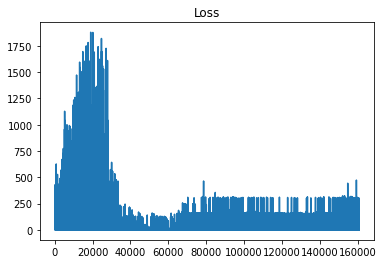

In [3]:
####################
# Lanar Lander env #
####################
env = gym.make("LunarLander-v2")
# Environment parameters
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]
print(n_actions,n_states)
# Hyperparameters
BATCH_SIZE = 64
LR = 0.0005 # learning rate
EPSILON = 1.0 # for epsilon-greedy policy
EPS_DECAY = 0.995
GAMMA = 0.99 # for Q-value
TARGET_ITER_CNT = 4 # every interation count, update target net once
BUFFER_SIZE = 100000 # replay buffer size(often larger than tager interation count)
NUM_HIDDEN = 64
NUM_EPISODE = 1000
LOG_INTERVAL = 10
TAU = 0.001
EPS_MIN = 0.01

# 建立 DQN
dqn = DQN(n_states, n_actions, BATCH_SIZE, LR, EPSILON, GAMMA, TARGET_ITER_CNT, BUFFER_SIZE, NUM_HIDDEN, EPS_DECAY, TAU)
reward_list = []
# 學習
for eps in range(NUM_EPISODE):
    t = 0
    rewards = 0
    state = env.reset()
    
    while True:
        # 選擇 action
        action = dqn.choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # 如果是terminal state就先在reward減去GAMMA*max_q-value, 避免訓練到terminal state 的q-value
        if done:
            ns = torch.FloatTensor([next_state]).to(device)
            target = dqn.target_net(ns)
            reward -= GAMMA*target.max(1)[0].to("cpu")
            
        # 儲存 experience
        dqn.store_transition(state, action, reward, next_state)

        # 累積 reward
        rewards += reward

        # 有足夠 experience 後進行訓練
        if(len(dqn.buffer) >= BATCH_SIZE):
            dqn.learn()

        # 進入下一 state
        state = next_state

        if done:
          print('t: {} timesteps, r: {}, eps: {}'.format(t+1, rewards, eps))
          reward_list.append(rewards)
          break
        t += 1
    dqn.epsilon = max(EPS_MIN,dqn.epsilon*EPS_DECAY)
env.close()
#
plt.title("Loss")
plt.plot(dqn.loss_list)
plt.show()

## 3-(a) 比較 finite MDP 和 LunarLander-v2 environment 之間return curves的差異
- 下圖的finite MDP return curve是舊的圖，新的圖在下面一格！(LunarLander要跑一整天，沒有時間再跑一次了qq）
- 兩者的主要差異在於finite MDP很快就達到最高的return value，而LunarLander則花了比較多的episode才達到比較高的return value，那原因的話我覺得可能是差在遊戲的難易度，finite MDP相比LunarLander就真的是過於簡單了一點，加上return value的多樣性差異，所以造成了這樣return cureves的差異。

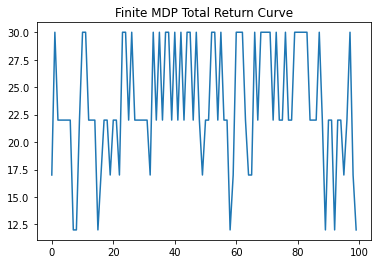

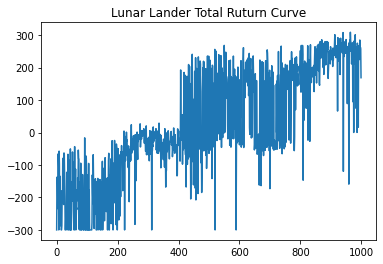

In [13]:
# env.play()
# env.close()
#
plt.title("Finite MDP Total Return Curve")
plt.plot(reward_list_MDP)
plt.show()
plt.title("Lunar Lander Total Ruturn Curve")
reward_list_LL = np.array(reward_list).clip(-300,1000)
plt.plot(reward_list_LL)
plt.show()


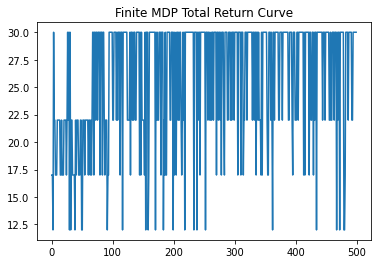

In [57]:
plt.title("Finite MDP Total Return Curve")
plt.plot(reward_list_MDP)
plt.show()

## 3-(b) 調整並分析超參數
- 下面修改了三種參數並呈現各自的return curve，原始return curve圖在上面可以參照一下
1. 把Learning rate由0.0005調成0.005，放大了一倍，但是卻發現沒辦法收斂，所以應該是學習的太快了，沒辦法穩定下來。
2. 把Batch size由64調成256，由return curve來看，應該算是有收斂，但是卻沒有原來的效果那個好，仍然會上下大幅度震盪，我覺得應該是因為放大batch size後，他有更大的機率去挑選到比較舊的遊玩經驗，而那些遊玩經驗其實是在Epsilon還很大的時候explore出來的，所以可能不是最好的（我有使用epsilon decay的機制，epsilon會隨著epsiode的增加而遞減）
3. 把Epsilon decay的速度調快一點，由0.995變成0.9，由圖可以看出他最後還是有學習到，但是reward還是偏低，並且在中段(episode 400\~600) 的時候沒有像原來的圖那樣表現出不錯的結果，反而是一直在-200~0之間擺盪，我覺得應該是因epsilon decay的太快，他一下子就開始一直執行exploitation，沒有做到足夠的exploration的關係。

In [25]:
env = gym.make("LunarLander-v2")
# Environment parameters
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]
print(n_actions,n_states)
# Hyperparameters
BATCH_SIZE = 64
LR = 0.0005 # learning rate
EPSILON = 1.0 # for epsilon-greedy policy
EPS_DECAY = 0.9
GAMMA = 0.99 # for Q-value
TARGET_ITER_CNT = 4 # every interation count, update target net once
BUFFER_SIZE = 100000 # replay buffer size(often larger than tager interation count)
NUM_HIDDEN = 64
NUM_EPISODE = 1000
LOG_INTERVAL = 10
TAU = 0.001
EPS_MIN = 0.01

# 建立 DQN
dqn = DQN(n_states, n_actions, BATCH_SIZE, LR, EPSILON, GAMMA, TARGET_ITER_CNT, BUFFER_SIZE, NUM_HIDDEN, EPS_DECAY, TAU)
reward_list = []
# 學習
for eps in range(NUM_EPISODE):
    t = 0
    rewards = 0
    state = env.reset()
    
    while True:
        # 選擇 action
        action = dqn.choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # 儲存 experience
        dqn.store_transition(state, action, reward, next_state)

        # 累積 reward
        rewards += reward

        # 有足夠 experience 後進行訓練
        if(len(dqn.buffer) >= BATCH_SIZE):
            dqn.learn()

        # 進入下一 state
        state = next_state

        if done:
          print('t: {} timesteps, r: {}, eps: {}'.format(t+1, rewards, eps))
          reward_list.append(rewards)
          break
        t += 1
    dqn.epsilon = max(EPS_MIN,dqn.epsilon*EPS_DECAY)
env.close()

4 8
t: 98 timesteps, r: -277.9893628805686, eps: 0
t: 71 timesteps, r: -72.57432124449599, eps: 1
t: 102 timesteps, r: -106.40301720952749, eps: 2
t: 90 timesteps, r: -323.22903808290846, eps: 3
t: 123 timesteps, r: -345.29162539207744, eps: 4
t: 73 timesteps, r: -440.8479866114356, eps: 5
t: 88 timesteps, r: -235.10439624404935, eps: 6
t: 77 timesteps, r: -601.1438546094137, eps: 7
t: 70 timesteps, r: -125.40763592917438, eps: 8
t: 100 timesteps, r: -599.3946865438072, eps: 9
t: 164 timesteps, r: -821.9147358143659, eps: 10
t: 63 timesteps, r: -355.0247055166638, eps: 11
t: 81 timesteps, r: -770.1467103066672, eps: 12
t: 86 timesteps, r: -536.0185178813001, eps: 13
t: 75 timesteps, r: -508.95630862187835, eps: 14
t: 57 timesteps, r: -171.1035733825276, eps: 15
t: 63 timesteps, r: -181.54472761506537, eps: 16
t: 91 timesteps, r: -753.2398896221616, eps: 17
t: 83 timesteps, r: -849.2618749395095, eps: 18
t: 105 timesteps, r: -275.4188339963549, eps: 19
t: 173 timesteps, r: -443.21043678

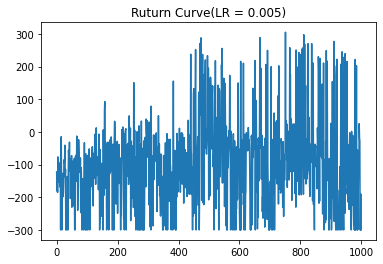

In [19]:
plt.title("Ruturn Curve(LR = 0.005)")
reward_list_LL = np.array(reward_list).clip(-300,1000)
plt.plot(reward_list_LL)
plt.show()

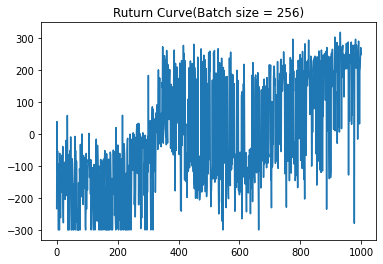

In [24]:
plt.title("Ruturn Curve(Batch size = 256)")
reward_list_LL = np.array(reward_list).clip(-300,1000)
plt.plot(reward_list_LL)
plt.show()

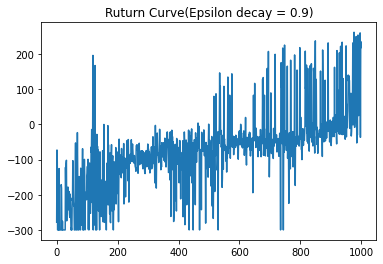

In [26]:
plt.title("Ruturn Curve(Epsilon decay = 0.9)")
reward_list_LL = np.array(reward_list).clip(-300,1000)
plt.plot(reward_list_LL)
plt.show()